### Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In this Project, you'll train a logistic regression using a feature besides EDUCATION. Then you will graphically assess the tradeoff between precision and recall, as well as calculate the area underneath a precision-recall curve. You will also calculate the ROC AUC on both the training and testing sets and compare them.

 ### Introduction to Scikit-Learn and Model Evaluation
* Explain the response variable
* Describe the implications of imbalanced data in binary classification
* Split data into training and testing sets
* Describe model fitting in scikit-learn
* Derive several metrics for binary classification
* Create an ROC curve and a precision-recall curveExplain the response variable
* Describe the implications of imbalanced data in binary classification
* Split data into training and testing sets
* Describe model fitting in scikit-learn
* Derive several metrics for binary classification
* Create an ROC curve and a precision-recall curve   

### Exploring the Response Variable and Concluding the Initial Exploration

In [64]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100

In [65]:
#loading dataset
df=pd.read_csv('Data set/cleaned_data.csv')

In [66]:
df['default payment next month'].mean()

0.2217971797179718

In [67]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

### Balanced data
**Undersampling** the majority class: randomly throwing out samples from the majority class until the class fractions are equal, or at least less imbalanced.

**Oversampling** the minority class: randomly adding duplicate samples of the minority class to achieve the same goal.

**Weighting samples** This method is performed as part of the training step, so the minority class collectively has as much "emphasis" as the majority class in the fitted model. The effect of this is similar to oversampling.

**QUESTIONS**
Is the data complete?
Are there missing values or other anomalies?

Is the data consistent?
Does the distribution change over time, and if so, is this expected?
Does the data make sense?

Do the values of the features fit with their definition in the data dictionary?

# Introduction to Scikity-Learn

**SciPy:**

Most of the packages we've used so far are actually part of the SciPy ecosystem.
SciPy itself offers lightweight functions for classical approaches such as linear regression and linear programming.

**StatsModels:**

More oriented toward statistics and more comfortable for users familiar with R
Can get p-values and confidence intervals on regression coefficients
Capability for time series models such as ARIMA

**XGBoost:**

Offers a state-of-the art ensemble model that often outperforms random forests

**TensorFlow, Keras, and PyTorch:**

Deep learning capabilities

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
ml_lr=LogisticRegression()

In [70]:
ml_lr

LogisticRegression()

In [71]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
my_new_lr.C=0.1
my_new_lr.solver='liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [73]:
X=df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [74]:
y=df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [76]:
ml_lr.fit(X,y)

LogisticRegression()

Now our model is a trained model.

In [77]:
new_X=df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [78]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# Generating Synthetic Data

In [80]:
np.random.seed(seed=1)
X=np.random.uniform(low=0.0,high=10.0,size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

## Data for a Linear Regression
y=ax+b+N(new,sigma) **Linear equation with Gaussian noise**



In [81]:
# code to create linear data with Gaussian noise is as follows:
np.random.seed(seed=1)
slope=0.25
intercept = -1.25
y=slope*X+np.random.normal(loc=0.0,scale=1.0,size=(1000,))+intercept

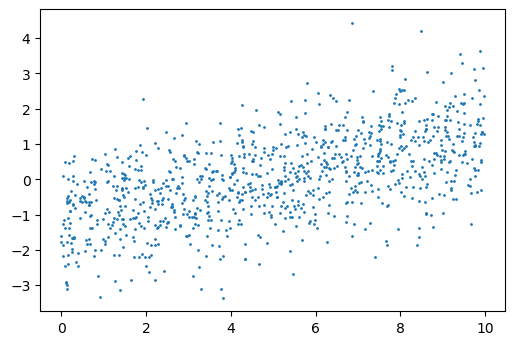

In [82]:
plt.scatter(X,y,s=1)

## Linear Regression in Scikit-Learn

In [83]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [84]:
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [85]:
y_pred=lin_reg.predict(X.reshape(-1,1))

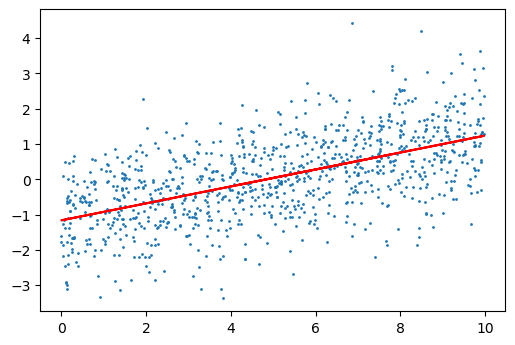

In [86]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

## Model Performance Metrics for Binary Classification
Appropriateness of the Metric for the Problem

For a binary classification problem, several metrics characterize the correctness of the yes or no question that the model answers.


regression metrics are aimed at measuring how close a prediction is to the target quantity.

## Splitting the Data: Training and Testing sets


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['EDUCATION'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2,random_state=24)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [89]:
np.mean(y_train)

0.223102526838873

In [90]:
np.mean(y_test)

0.21657603600225014

In [91]:
np.mean(X_train)

1.8437016548685012

In [92]:
np.mean(X_test)

1.836864804050253

# Classification Accuracy
**binary classification metrics**

In [93]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [94]:
example_lr.fit(X_train,y_train)
y_pred=example_lr.predict(X_test)

##### simplest of all binary classification metrics: accuracy.
* Accuracy is defined as the proportion of samples that were correctly classified.

In [95]:
is_correct=y_pred==y_test
np.mean(is_correct)

0.7834239639977498

In [96]:
example_lr.score(X_test,y_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)


0.7834239639977498

### Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python


In [97]:
#number of positive samples.
P= sum(y_test)

In [98]:
P

1155

In [99]:
TP=sum((y_test==1)&(y_pred==1))
TP

0

In [100]:
#true positive rate

TPR=TP/P
TPR

0.0

In [101]:
FN=sum((y_test==1)&(y_pred==0))
FN

1155

In [102]:
#false negative rate
FNR=FN/P
FNR

1.0

In [103]:
N=sum(y_test==0)
TN=sum((y_test==0)&(y_pred==0))
FP=sum((y_test==0)&(y_pred==1))
TNR=TN/N
FPR=FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR,FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [104]:
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

### Obtaining Predicted Probabilities from a Trained Logistic Regression Model

In [105]:
y_pred_proba=example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [106]:
prob_sum=np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [107]:
prob_sum.shape

(5333,)

In [108]:
np.unique(prob_sum)

array([1.])

In [109]:
pos_proba=y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

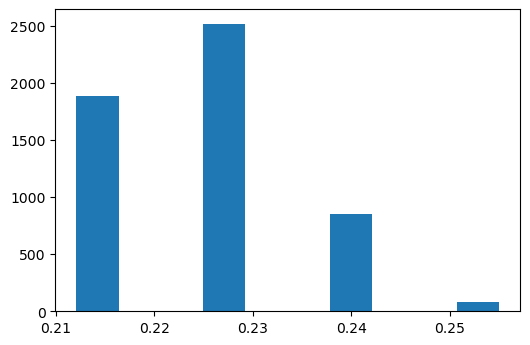

In [110]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

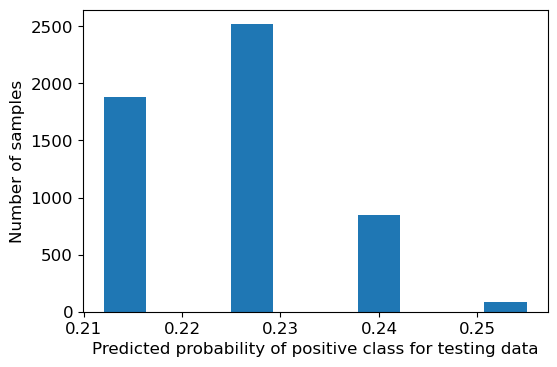

In [111]:
mpl.rcParams['font.size']=12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [112]:
pos_sample_pos_proba=pos_proba[y_test==1]
neg_sample_pos_proba=pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

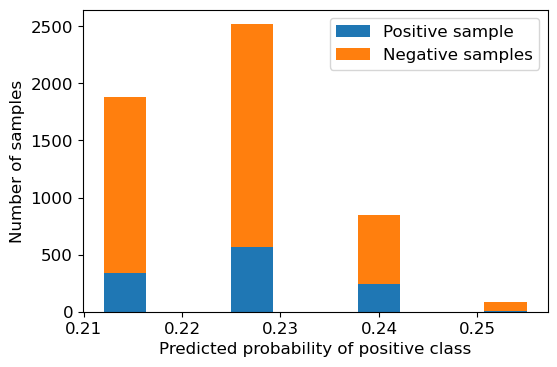

In [113]:
#stacked histogram
plt.hist([pos_sample_pos_proba,neg_sample_pos_proba],histtype='barstacked')
plt.legend(['Positive sample','Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

## The Receiver Operating Characteristic (ROC) Curve

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

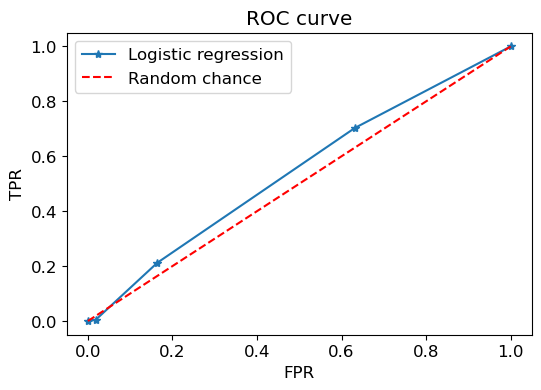

In [115]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [116]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [117]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642